# Seasonality of Time Series


## Introduction

Seasonality is a crucial aspect of time-series analysis. As time-series are indexed forward in time, they are subject to seasonal fluctuations. For example, we expect ice cream sales to be higher in the summer months and lower in the winter months.

Seasonality can come in different time intervals such as days, weeks or months. The key for time-series analysis is to understand how the seasonality affects our series, therefore making us produce better forecasts for the future.

The easiest way to deal with seasonality is to remove it and make our **time-series stationary**, which is a requirement by most forecasting models. However, there are models such as SARIMA that model the seasonal affects for you.

## Viewing Seasonality


In [1]:
# Import packages
import plotly.express as px
import pandas as pd
from statsmodels.tsa.stattools import adfuller
import numpy as np
import kagglehub

/Users/amirashrafizham/Desktop/Machine Learning Projects/time-series/time-series-models/statisticalmodel/.venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Read in the data
path = kagglehub.dataset_download("ashfakyeafi/air-passenger-data-for-time-series-analysis")
data = pd.read_csv(path + "/AirPassengers.csv")

In [3]:

import matplotlib.pyplot as plt

def plotting(title, data, x, y, x_label, y_label):
    """General function to plot the passenger data (Matplotlib version)."""
    data[x] = pd.to_datetime(data['Month'])
    plt.figure(figsize=(6, 4))
    plt.plot(data[x], data[y])
    plt.title(title)

    #plt.grid(True, linestyle="--", alpha=0.7)
    plt.show()


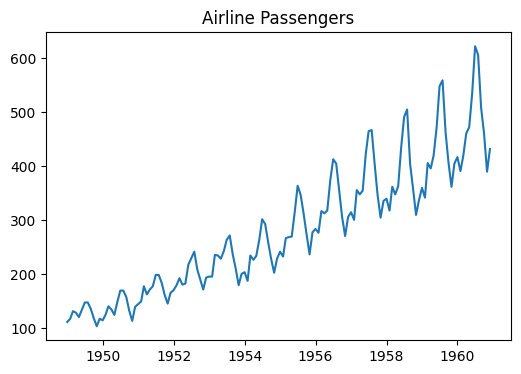

In [4]:
# Plot the airline passenger data
plotting(title='Airline Passengers', data=data, x='Month',
         y='#Passengers', x_label='Date', y_label='Passengers')

The data is indexed by month and we can clearly see a yearly seasonal pattern where the number of passengers peaks in the summer months. There is also the overrall trend of the number of passengers increasing through time.

## Removing Seasonality

We can remove seasonality in the data using seasonal differencing. This calculates the difference between the current value and its value in the previous season. The reason this is done is to make the time series stationary rendering its statistical properties constant through time. Seasonality causes the mean of the time series to be different when we are in a particular season. Hence, its statistical properties are not constant.

$$
d(t) = y(t) - y(t - m)
$$

Where d(t) is the differenced data point at time t, y(t) is the value of the series at t, y(t-m) is the value of the data point at the previous season and m is the length of one season. In our case m=12 as we have yearly seasonality.

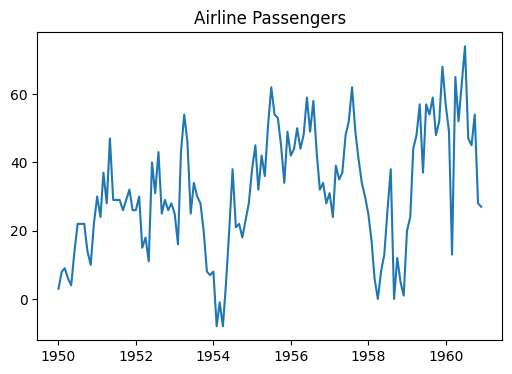

In [5]:
# Take the seasonal difference and plot it
data["Passenger_Season_Diff"] = data["#Passengers"].diff(periods=12)

plotting(title='Airline Passengers', data=data, x='Month', y='Passenger_Season_Diff',
         x_label='Date', y_label='Passenger<br>Seasonal Difference')

The yearly seasonality has disappeared now, however we now observe some cycle. This is another common feature time series which is similar to seasonality but are typically on a longer timescale as observed here.

## ADF Test

We can test that the resultant series is stationary using the Augmented Dickey-Fuller (ADF) test. The null hypothesis of this test is that the series is non-stationary. The statsmodels package provides a function for carrying out the ADF test:

In [6]:
def adf_test(series):
    """Using an ADF test to determine if a series is stationary"""
    test_results = adfuller(series)
    print('ADF Statistic: ', test_results[0])
    print('P-Value: ', test_results[1])
    print('Critical Values:')
    for thres, adf_stat in test_results[4].items():
        print('\t%s: %.2f' % (thres, adf_stat))


adf_test(data["Passenger_Season_Diff"][12:])

ADF Statistic:  -3.38302072649248
P-Value:  0.01155149308551501
Critical Values:
	1%: -3.48
	5%: -2.88
	10%: -2.58


The P-Value is lower than the 5% and 10% threshold, but higher than the 1% threshold. Therefore, depending on your significance level we can either statistically confirm or deny that our series is stationary.

We can also carry out some further regular differencing (difference between adjacent values) to further reduce the P-Value. However, in this case I think the data is adequately stationary given it is below the 5% threshold.